In [ ]:
# >>> setting up remote server:
# - go to Dagshub (sign up with github)
# - create > new repo > connect a repo > github > select the repo > connect repo > 
#   go to dagshub repo > remote > experiments > copy tracking uri







In [ ]:
import mlflow
from sklearn.datasets import load_wine 
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from  sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 


import dagshub
dagshub.init(repo_owner='nikhilnagar503', repo_name='MLFLOW_pract', mlflow=True)


❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

c:\Users\nagar\AppData\Local\Programs\Python\Python310\lib\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=f10e6fb1-212a-4208-ad3d-14124c8a037b&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=810e66a31a3a732ee8bacfb0913732ddb62b21345fb8b232a475be3a89a37633




Accessing as nikhilnagar503

Initialized MLflow to track repo "nikhilnagar503/MLFLOW_pract"

Repository nikhilnagar503/MLFLOW_pract initialized!

In [8]:
mlflow.set_tracking_uri("https://dagshub.com/nikhilnagar503/MLFLOW_pract.mlflow")

wine = load_wine()

X = wine.data 
y = wine.target

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2,random_state=42)


# max_depth = 10
# n_estimators  = 5


# max_depth = 7
# n_estimators  = 10


# max_depth = 8
# n_estimators  = 20


max_depth = 10
n_estimators  = 15

2025/05/26 02:28:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


1.0
🏃 View run redolent-kit-387 at: https://dagshub.com/nikhilnagar503/MLFLOW_pract.mlflow/#/experiments/0/runs/b7d226e0e5564c0a8e746b5914b24829
🧪 View experiment at: https://dagshub.com/nikhilnagar503/MLFLOW_pract.mlflow/#/experiments/0


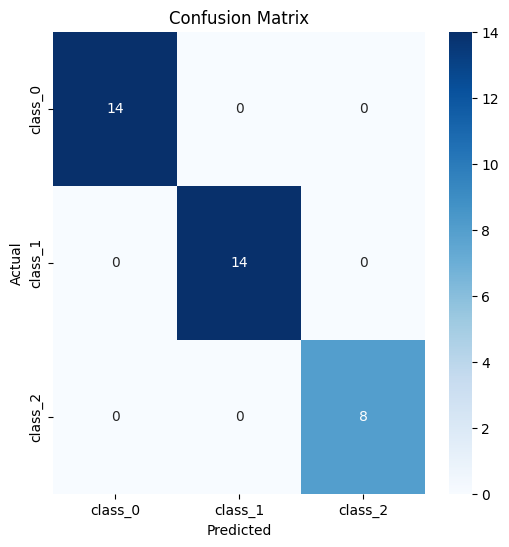

In [9]:
with mlflow.start_run():
    rf = RandomForestClassifier(max_depth=max_depth,n_estimators=n_estimators,random_state=42)
    rf.fit(X_train,y_train)

    y_pred = rf.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)


    mlflow.log_metric("accuracy",accuracy)
    mlflow.log_param("max_depth",max_depth)
    mlflow.log_param("n_estimators",n_estimators)



    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.savefig("Confusion-matrix.png")


    mlflow.log_artifact("Confusion-matrix.png")
    

    mlflow.set_tags({"authoer":'Nikhil',"project":'wine clasification'})

    mlflow.sklearn.log_model(rf,"random forest model")



    print(accuracy)